<br><h2>A2: Regression Model Development (Individual)</h2>
<h3>Writing Requirement</h3>

For this project, we are working with Apprentice Chef, Inc. which is a company that specialized in providing meal plan solutions to professionals with recipes and all that is needed to have a delicious home meal in less than 30 minutes. 

The dataset called we are using is Apprentice_Chef_Dataset_2023.xlsx, a document containing 1946 entries and 19 different columns from which we will take 'REVENUE' as the values for Y.


<h3>Importing packages and dataset</h3>

To start with this project, first, we import all the libraries and the dataset we are going to use throughout the whole document, followed by the settings for the print using pandas. Then we store the file path in the variable ‘file’ and open the excel file with pandas and we store it inside the object ‘apprentice’.

Finally, we show the first 10 rows of the table to check everything is fine. 



In [11]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling

#importing train test models
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model                          # linear modeling in scikit-learn

# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm
from sklearn.tree import plot_tree                     # tree plots


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Dataset/Apprentice_Chef_Dataset_2023.xlsx'


# reading the file into Python
apprentice = pd.read_excel(io = file)


# outputting the first ten rows of the dataset
apprentice.head(n= 10)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
5,2917.5,Rollam Westerling,rollam.westerling@jnj.com,Rollam,Westerling,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16
6,3901.5,Utt,utt@passport.com,Utt,Utt,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
7,5000.0,Bandy,bandy@aol.com,Bandy,Bandy,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
8,3090.0,Rickard Karstark,rickard.karstark@live.com,Rickard,Karstark,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
9,5745.0,Androw Frey,androw.frey@protonmail.com,Androw,Frey,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664


<h4>Checking the data and structure </h4>

In this section we use the methods .info(), .columns() and .value_counts() to take a look at the values inside the excel file. With .info() we get a summary of the rows, columns, type of data and if there is any missing value which in this case, there are 46 rows without the family name information. 

We use .columns() to see the names of each column and .value_counts() to look inside each column and understand the structure of the values. 


In [12]:
#We analyse the integrity of data and check for essential structural information  
apprentice.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

In [13]:
print(apprentice.columns)
#'LATE_DELIVERIES ' has a space after the S

Index(['REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [14]:
#Checking for the type of values (cont, inter,cate)  
apprentice['LARGEST_ORDER_SIZE'].value_counts()



4     547
5     449
3     391
6     236
2     135
7      89
8      49
9      20
1      17
10     12
11      1
Name: LARGEST_ORDER_SIZE, dtype: int64

In [15]:
#separating the values by group

# interval_val = ['AVG_PREP_VID_TIME',
#                 'AVG_MEAN_RATING',
#                 'TOTAL_MEALS_ORDERED', #-> AVG_MEALS_ORDERED
#                 'UNIQUE_MEALS_PURCH',
#                 'CONTACTS_W_CUSTOMER_SERVICE',
#                 'PRODUCT_CATEGORIES_VIEWED',
#                 'CANCELLATIONS_AFTER_NOON',
#                 'PC_LOGINS',
#                 'MOBILE_LOGINS',
#                 'WEEKLY_PLAN',
#                 'LATE_DELIVERIES ', #this one has an extra space -> 'LATE_DELIVERIES'
#                 'LARGEST_ORDER_SIZE',
#                 'TOTAL_PHOTOS_VIEWED']

#interval_val =   []

#categorical_val = ['NAME',
#                  'EMAIL',
#                  'FIRST_NAME',
#                  'FAMILY_NAME'] #this one has 46 missing values

<h4>Making Initial Fixes </h4>

In [16]:
###we made this addition to avoid having errors while using OLS

#fixing 'LATE_DELIVERIES ' to 'LATE_DELIVERIES' without extra space (additional for OLS)
apprentice['LATE_DELIVERIES'] = apprentice['LATE_DELIVERIES '].copy()
 
#apprentice.head(10) 

In [17]:
#Understanding the missing values
apprentice_filtered = apprentice[ apprentice['FIRST_NAME'].notnull() & apprentice['FAMILY_NAME'].isnull()]
apprentice_filtered.head(10)

#The missing values are the result of people forgetting the type their lastname but it is included 
#in the section 'NAME' within parenthesis E.g. NAME= Lem (Standfast) FIRST_NAME=Lem FAMILY_NAME= NaN

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,LATE_DELIVERIES
54,825.0,Lem (Standfast),lem.(standfast)@yahoo.com,Lem,NaN,12,12,1,9,115.2,1,6,2,13,0,70.45,4,4.210526,58,0
98,1750.0,Will (squire),will.(squire)@passport.com,Will,NaN,43,6,1,4,169.1,4,6,2,2,0,96.00,3,3.684211,17,0
120,1249.0,Pate (Mory),pate.(mory)@goldmansacs.com,Pate,NaN,98,7,1,3,186.9,1,5,1,47,0,93.20,5,3.421053,3,0
280,800.0,Kyle (brotherhood),kyle.(brotherhood)@jpmorgan.com,Kyle,NaN,14,11,2,3,86.1,1,5,2,7,0,78.04,3,3.421053,19,0
294,1580.0,Wat (orphan),wat.(orphan)@amex.com,Wat,NaN,48,7,2,3,144.5,2,5,2,38,0,125.95,5,3.421053,115,0
325,1811.0,Wat (Wet),wat.(wet)@apple.com,Wat,NaN,43,8,2,8,134.0,1,6,1,0,0,87.99,4,3.157895,10,0
354,3090.0,Will (Treb),will.(treb)@dupont.com,Will,NaN,172,8,3,2,191.6,2,5,1,13,0,115.50,6,2.631579,18,0
417,1030.0,Lanna (Happy Port),lanna.(happy.port)@live.com,Lanna,NaN,13,11,3,3,144.7,0,4,2,20,8,104.34,4,3.947368,13,8
436,1270.0,Wyl (guard),wyl.(guard)@travelers.com,Wyl,NaN,93,5,3,10,92.5,1,5,2,0,0,80.40,3,3.947368,19,0
472,2775.0,Lyonel (knight),lyonel.(knight)@gmail.com,Lyonel,NaN,126,5,3,1,175.5,3,6,2,12,8,128.49,5,3.421053,196,8


<h3>Training and Testing Sets</h3>




<h4>Getting the Benchmark correlation of the dataset</h4>

In this part, we generated a benchmark for how each variable contributes to the correlation with REVENUE. Additionally, we also generate a logarithmic mutation for ‘REVENUE’ with the intention of comparing which version of REVENUE has a higher score in our model. 

I have decided to use LOG_REVENUE since in most cases each variable has a slightly higher correlation with REVENUE and we are logging for a stronger relationship between variables. 

Finally, we engineer 2 more features HIGH_COMPLAINS and RATIO_TIME_ON_GUIDE to try to explain a little bit better how revenue is being affected and compare the correlation that these 3 new features add to the overall model. 



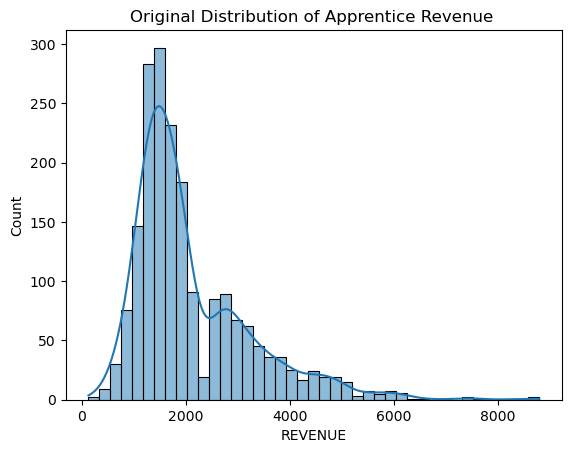

In [18]:
sns.histplot(data   = apprentice,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Apprentice Revenue ")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [19]:
apprentice['LOG_REVENUE'] = np.log(apprentice['REVENUE'])

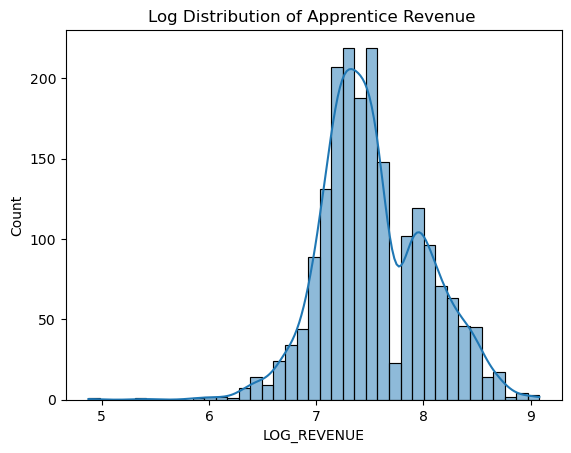

In [20]:
sns.histplot(data   = apprentice,
             x      = 'LOG_REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Log Distribution of Apprentice Revenue ")
plt.xlabel(xlabel = "LOG_REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [21]:
# developing a correlation matrix based on continuous features
apprentice_corr = apprentice.corr(method = 'pearson')

# filtering the results to only show correlations with Sale_Price
apprentice_corr.loc[ : , ['REVENUE','LOG_REVENUE']].round(decimals = 2).sort_values(by = 'REVENUE',
                                                                                    ascending = False)

,REVENUE,LOG_REVENUE
REVENUE,1.00,0.95
LOG_REVENUE,0.95,1.00
AVG_TIME_PER_SITE_VISIT,0.64,0.65
TOTAL_MEALS_ORDERED,0.60,0.61
TOTAL_PHOTOS_VIEWED,0.46,0.43
LARGEST_ORDER_SIZE,0.44,0.45
CONTACTS_W_CUSTOMER_SERVICE,0.17,0.18
AVG_PREP_VID_TIME,0.14,0.14
UNIQUE_MEALS_PURCH,0.10,-0.04
MOBILE_LOGINS,0.07,0.08


In [22]:
# Step 1: INSTANTIATE a model object
lm_apprentice = smf.ols(formula =  """LOG_REVENUE ~ AVG_TIME_PER_SITE_VISIT +
                                                AVG_PREP_VID_TIME +
                                                AVG_MEAN_RATING +
                                                TOTAL_MEALS_ORDERED +
                                                UNIQUE_MEALS_PURCH +
                                                CONTACTS_W_CUSTOMER_SERVICE +
                                                PRODUCT_CATEGORIES_VIEWED +
                                                CANCELLATIONS_AFTER_NOON +
                                                PC_LOGINS +
                                                MOBILE_LOGINS +
                                                WEEKLY_PLAN +
                                                LATE_DELIVERIES  +
                                                LARGEST_ORDER_SIZE +
                                                TOTAL_PHOTOS_VIEWED """,
                                data = apprentice)


# Step 2: FIT the data into the model object
results = lm_apprentice.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            LOG_REVENUE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     244.1
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        19:32:58   Log-Likelihood:                -372.01
No. Observations:                1946   AIC:                             774.0
Df Residuals:                    1931   BIC:                             857.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [23]:
apprentice['HIGH_COMPLAINS']      = 0
apprentice['RATIO_TIME_ON_GUIDE'] = apprentice['AVG_TIME_PER_SITE_VISIT']/apprentice['AVG_PREP_VID_TIME']


for index, value in apprentice.iterrows():
        
     if apprentice.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 4 and apprentice.loc[index, 'AVG_MEAN_RATING']< 3: 
        apprentice.loc[index, 'HIGH_COMPLAINS'] = 1

apprentice.head()

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,LATE_DELIVERIES,LOG_REVENUE,HIGH_COMPLAINS,RATIO_TIME_ON_GUIDE
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0,8.501064,0,1.932902
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0,8.724207,0,2.054908
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,8.141772,0,1.294488
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0,8.110728,0,1.356141
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,8.139586,0,4.782103


In [24]:
# developing a correlation matrix based on continuous features
apprentice_corr = apprentice.corr(method = 'pearson')

# filtering the results to only show correlations with Sale_Price
apprentice_corr.loc[ : , ['REVENUE','LOG_REVENUE']].round(decimals = 2).sort_values(by = 'REVENUE',
                                                                                    ascending = False)

,REVENUE,LOG_REVENUE
REVENUE,1.00,0.95
LOG_REVENUE,0.95,1.00
AVG_TIME_PER_SITE_VISIT,0.64,0.65
TOTAL_MEALS_ORDERED,0.60,0.61
TOTAL_PHOTOS_VIEWED,0.46,0.43
LARGEST_ORDER_SIZE,0.44,0.45
HIGH_COMPLAINS,0.35,0.33
RATIO_TIME_ON_GUIDE,0.18,0.18
CONTACTS_W_CUSTOMER_SERVICE,0.17,0.18
AVG_PREP_VID_TIME,0.14,0.14


<h4>Preparing for scikit-learn</h4>




In [25]:
#creating x_variables

x_var       = ['AVG_TIME_PER_SITE_VISIT',
               'AVG_PREP_VID_TIME',
               'AVG_MEAN_RATING',
               'TOTAL_MEALS_ORDERED',
               'UNIQUE_MEALS_PURCH',
               'CONTACTS_W_CUSTOMER_SERVICE',
               'PRODUCT_CATEGORIES_VIEWED',
               'CANCELLATIONS_AFTER_NOON',
               'PC_LOGINS',
               'MOBILE_LOGINS',
               'WEEKLY_PLAN',
               'LATE_DELIVERIES',
               'LARGEST_ORDER_SIZE',
               'TOTAL_PHOTOS_VIEWED']


# x-variables for log y including engenierd
x_var_log_y = ['AVG_TIME_PER_SITE_VISIT',
               'AVG_PREP_VID_TIME',
               'AVG_MEAN_RATING',
               'TOTAL_MEALS_ORDERED',
               'UNIQUE_MEALS_PURCH',
               'CONTACTS_W_CUSTOMER_SERVICE',
               'PRODUCT_CATEGORIES_VIEWED',
               'PC_LOGINS',
               'MOBILE_LOGINS',
               'LATE_DELIVERIES',
               'LARGEST_ORDER_SIZE',
               'TOTAL_PHOTOS_VIEWED',
               'HIGH_COMPLAINS',
               'RATIO_TIME_ON_GUIDE']

x_data = apprentice.loc[ : , x_var]
#x_data = apprentice.loc[ : , x_var_log_y]

# preparing response variable
#y_data     = apprentice.loc[ : , 'REVENUE'] #you can also use this one
y_data = apprentice.loc[ : , 'LOG_REVENUE'] #you cahnge it based on what you want to use 


###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

<h3>Regression Models</h3>

Now,  using the previous information we generate the Train_Score, Test_Score and  Train-Test Gap for a linear regression model, the lasso regression model and the ARD regression model to see which can explain our information with a higher.

<h4>Linear Regression</h4>

The first model to try, It tries to predict future outcomes by establishing a line that represents the trend in our data. In this case, the score between our train and the test is 0.63 and the gap is below 1%. This is basically telling us that our model is fitting well to the dataset and the accuracy of the assumed new data is higher. However, we want to reach a minimum of 0.75 in our test core so we move on to the next model to compare our results and see which model adapts better to our data. 

In [26]:
# Setting a model name
model_name = "Linear Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)

# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

In [27]:
# dynamically printing results
ols_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}



Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ols_model)

    

Model Name:     Linear Regression
Train_Score:    0.6348
Test_Score:     0.6389
Train-Test Gap: 0.0041



Coefficents
-----------
                        Feature  Coefficient
0                     intercept         7.40
1       AVG_TIME_PER_SITE_VISIT         0.00
2             AVG_PREP_VID_TIME        -0.00
3               AVG_MEAN_RATING        -0.17
4           TOTAL_MEALS_ORDERED         0.00
5            UNIQUE_MEALS_PURCH        -0.01
6   CONTACTS_W_CUSTOMER_SERVICE         0.03
7     PRODUCT_CATEGORIES_VIEWED         0.00
8      CANCELLATIONS_AFTER_NOON        -0.00
9                     PC_LOGINS        -0.01
10                MOBILE_LOGINS         0.02
11                  WEEKLY_PLAN        -0.00
12              LATE_DELIVERIES        -0.00
13           LARGEST_ORDER_SIZE        -0.05
14          TOTAL_PHOTOS_VIEWED         0.00


<h4>Lasso Regression</h4>

For the case of lasso, while using the exact same data, our train and test scores go down. This model penalizes the variables that are not so relevant in order to prevent overfitting (the coefficient of non-relevant variable are shrunk to 0) but at the same time our gap goes up slightly.

In [28]:
model_name = "Lasso Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Lasso()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)

# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

In [29]:
# dynamically printing results
lasso_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}



Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(lasso_model)

Model Name:     Lasso Regression
Train_Score:    0.5502
Test_Score:     0.5203
Train-Test Gap: 0.0299



Coefficents
-----------
                        Feature  Coefficient
0                     intercept         6.69
1       AVG_TIME_PER_SITE_VISIT         0.00
2             AVG_PREP_VID_TIME        -0.00
3               AVG_MEAN_RATING        -0.00
4           TOTAL_MEALS_ORDERED         0.00
5            UNIQUE_MEALS_PURCH        -0.00
6   CONTACTS_W_CUSTOMER_SERVICE         0.00
7     PRODUCT_CATEGORIES_VIEWED         0.00
8      CANCELLATIONS_AFTER_NOON        -0.00
9                     PC_LOGINS        -0.00
10                MOBILE_LOGINS         0.00
11                  WEEKLY_PLAN        -0.00
12              LATE_DELIVERIES        -0.00
13           LARGEST_ORDER_SIZE        -0.00
14          TOTAL_PHOTOS_VIEWED         0.00


<h4>ARD Regression</h4>

Finally, utilizing our last linear model (ARD regression) we get the lowest score so far. This happens because the ARD regression makes the assumption that some resulting coefficients are probably close to zero and ultimately removes them altogether from the model. In some cases, it can help us to do better generalizations but in this case is reducing the performance for our dataset.

In [30]:
# Setting a model name
model_name = "ARD Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-s
model_test_score  = model.score(x_test, y_test).round(4)   # using R-s
model_gap         = abs(model_train_score - model_test_score).round(4)

# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

In [31]:
# dynamically printing results
ard_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}



Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ard_model)

Model Name:     ARD Regression
Train_Score:    0.4166
Test_Score:     0.4333
Train-Test Gap: 0.0167



Coefficents
-----------
                        Feature  Coefficient
0                     intercept         8.37
1       AVG_TIME_PER_SITE_VISIT         0.00
2             AVG_PREP_VID_TIME         0.00
3               AVG_MEAN_RATING        -0.37
4           TOTAL_MEALS_ORDERED         0.00
5            UNIQUE_MEALS_PURCH         0.00
6   CONTACTS_W_CUSTOMER_SERVICE         0.02
7     PRODUCT_CATEGORIES_VIEWED         0.00
8      CANCELLATIONS_AFTER_NOON         0.00
9                     PC_LOGINS        -0.01
10                MOBILE_LOGINS         0.00
11                  WEEKLY_PLAN         0.00
12              LATE_DELIVERIES         0.00
13           LARGEST_ORDER_SIZE         0.09
14          TOTAL_PHOTOS_VIEWED         0.00


<h3>Classification And Regression Trees</h3>

For our final part, we have 4 more tools we can utilize to try to explain our dataset in a more effective way, the regression trees and the random forests. They work by splitting the data into smaller and smaller subsets based on the variables we are using and it is a process that repeats itself over and over again until it reaches the maximum depth (up to down levels) and the desired minimum simple. 

 We can also use them to predict variables by creating a path of where is it likely for the information to go. The problem with this model is that we can overfit data and then we will end up with just a map of just noise that we can't really use to get valuable information ( we made it too deep or too broad).


For the sake of testing, we are creating 2 objects called full_x and reduced_x, which basically are the complete list of variables and the list of variables including the changes we decided to make such as feature engineering or removal of non-relevant features.  In this way, we can easily replace just one world in our code and see the results of different sets and decide which one is the best. 

Same as the previous models, in this case we are working with ‘LOG_REVENUE’ as the dependant variable Y (higher correlation compared to standard REVENUE).

In [32]:
# declaring sets of x-variables
full_x = ['AVG_TIME_PER_SITE_VISIT',
          'AVG_PREP_VID_TIME',
          'AVG_MEAN_RATING',
          'TOTAL_MEALS_ORDERED',
          'UNIQUE_MEALS_PURCH',
          'CONTACTS_W_CUSTOMER_SERVICE',
          'PRODUCT_CATEGORIES_VIEWED',
          'CANCELLATIONS_AFTER_NOON',
          'PC_LOGINS',
          'MOBILE_LOGINS',
          'WEEKLY_PLAN',
          'LATE_DELIVERIES',
          'LARGEST_ORDER_SIZE',
          'TOTAL_PHOTOS_VIEWED']


reduced_x = ['AVG_TIME_PER_SITE_VISIT',
               'AVG_PREP_VID_TIME',
               'AVG_MEAN_RATING',
               'TOTAL_MEALS_ORDERED',
               'UNIQUE_MEALS_PURCH',
               'CONTACTS_W_CUSTOMER_SERVICE',
               'PRODUCT_CATEGORIES_VIEWED',
               'PC_LOGINS',
               'MOBILE_LOGINS',
               'LATE_DELIVERIES',
               'LARGEST_ORDER_SIZE',
               'TOTAL_PHOTOS_VIEWED',
               'HIGH_COMPLAINS',
               'RATIO_TIME_ON_GUIDE']



In [33]:
# preparing x-variables

x_data = apprentice[full_x]
#x_data = apprentice[reduced_x] # x-variables (can change this)

# preparing y-variable
#y_data = apprentice['REVENUE']    # y-variable 
y_data = apprentice['LOG_REVENUE'] # y-variable

In [34]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 219)

In [35]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<h4>Unpruned and Pruned Regression Tree</h4>

In the first part, we have the Unpruned tree, where basically we don't make any alterations and we let the model run freely. The initial result yields a training gap of almost 50% and this makes it basically useless when compared to the linear models previously applied, but,  we can make some adaptation to improve our score. 

Instead of letting the tree grow wild, play around with the max depth we want (how many levels to have) and the number of leaves. In my case, I have selected a depth of 8 and 30 for the leaves, something that resulted in a training score of 70% and a gap below our relevant limit of 5%. 

Here is it important to play with the numbers because adding too many levels of dept will reduce the effectiveness of your model and a few levels will be the reason for the model to underperform. I started with 5 and 15 for each corresponding value and based on each test I changed them to bring my score up every time until I got 1 with the one I felt comfortable with. 

In [36]:
model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor()




# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
Model: {model_name}
-------------------

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

""")


Model: Unpruned Regression Tree
-------------------

Training Score : 1.0
Testing Score  : 0.5277
Train-Test Gap : 0.4723




In [37]:
model_name = 'Pruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(max_depth=        8,
                              min_samples_leaf= 35,
                              random_state=     219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
Model: {model_name}
-------------------

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

""")


Model: Pruned Regression Tree
-------------------

Training Score : 0.7457
Testing Score  : 0.7105
Train-Test Gap : 0.0352




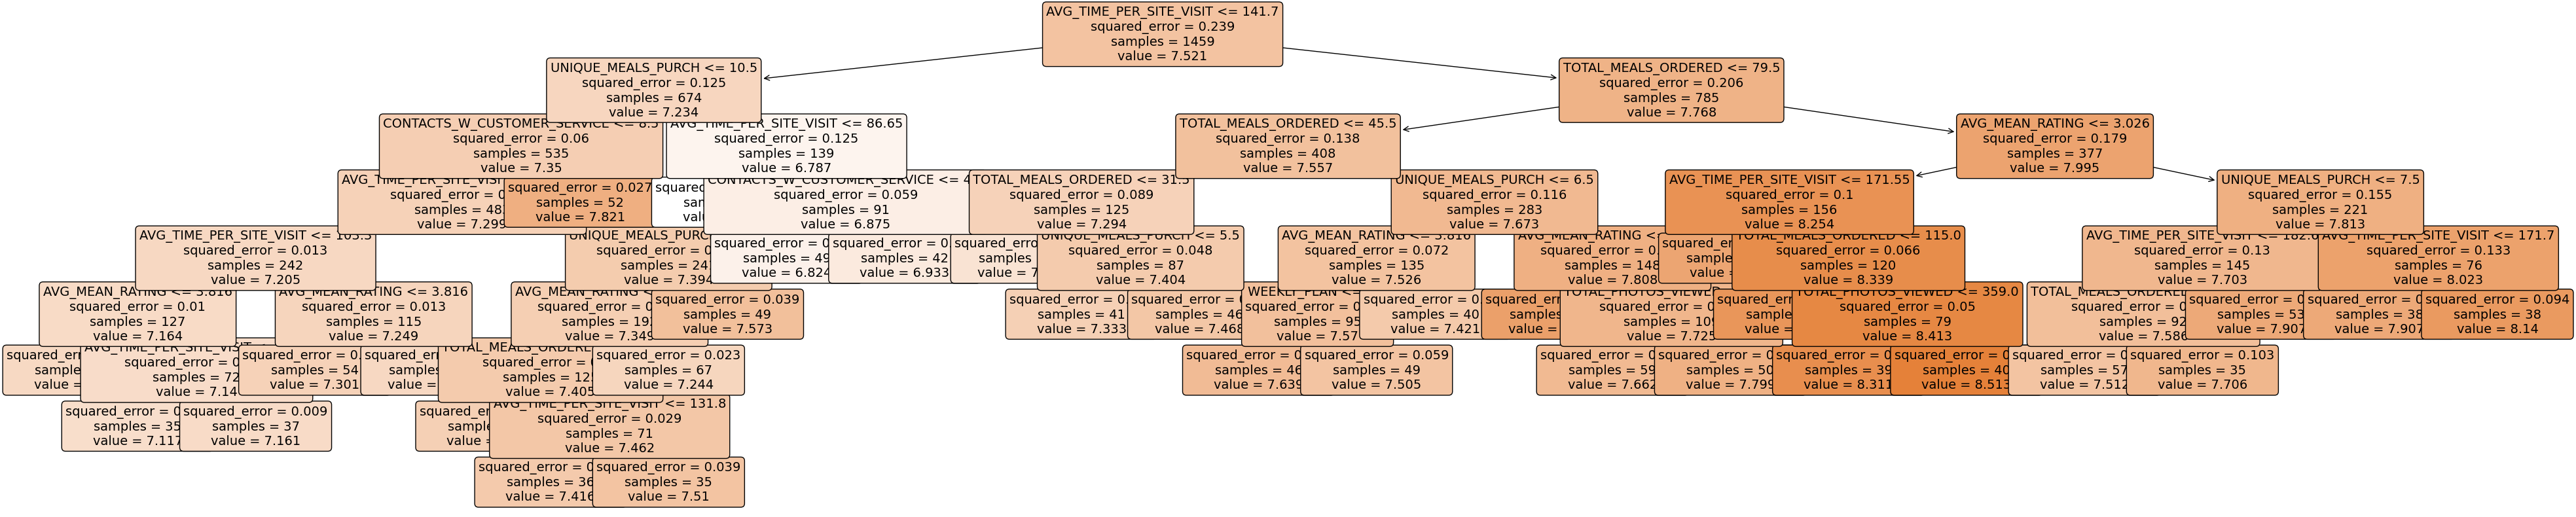

In [38]:
# setting figure size
plt.figure(figsize=(50, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

<h4>Unpruned and Pruned Random Forest</h4>

Then we have the random forest, in this case, they don't take into consideration the strength of the correlation but they consider the path of several decision trees to improve our suggested predictions. It takes random samples of the trees generated and clusters them into accepted or rejected values based on the result of the relative majority.

Just like the previous method, we can let it grow wild or we can “prune” it to shape it in a way that fits better our model. On the left, we get a score of 81% which is the highest so far, but with a gap of 16%, this tells us that the predictions of this model are not so good at generalizing new data and therefore we have a higher margin of error. 

In the pruned version of the random forest, we play once more with the numbers such as N estimator, depth, sample leaves, and whether or not we want to use a warm start. It is recommended to start with an estimator between 100-200,  depth 5-10, and leaf 5-10 but the depth and leaf had the highest impact related to the test score and gap. Therefore i found that playing with these settings, a 9-depth and 13-leafs gave me the highest score possible without surpassing the significant gap level of 5% 


In [39]:
# specifying a model name
############################################################################
model_name = 'Unpruned Random Forest'

# INSTANTIATING a random forest model with default values
model = RandomForestRegressor()








# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
Model: {model_name}
-------------------

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}


""")


Model: Unpruned Random Forest
-------------------

Training Score : 0.9732
Testing Score  : 0.815
Train-Test Gap : 0.1582





In [40]:
# specifying a model name
model_name = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 150,
                              criterion        = 'squared_error',
                              max_depth        = 9,
                              min_samples_leaf = 13,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)
                               

# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
Model: {model_name}
-------------------

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

""")


Model: Pruned Random Forest
-------------------

Training Score : 0.8438
Testing Score  : 0.7966
Train-Test Gap : 0.0472




<h3>Best model:
    Pruned Random Forest</h3>
    
Ultimately, the model I have decided to use as the best model was the Pruned Random Forest because it yields the best score from all the models in exchange for a little bit of extra gap without reaching a percentage that would make it irrelevant or not adequate to use. 

I would prefer to have a model with a lower gap, but from testing different options I believe this is a good combination of test score and gap.
 

In [41]:
# specifying a model name
model_name = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 150,
                              criterion        = 'squared_error',
                              max_depth        = 9,
                              min_samples_leaf = 13,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)
                               

# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
** Best model **
Model: {model_name}
-------------------

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

""")


** Best model **
Model: Pruned Random Forest
-------------------

Training Score : 0.8438
Testing Score  : 0.7966
Train-Test Gap : 0.0472


